<a href="https://colab.research.google.com/github/hamrioui2019/Machine-learning-/blob/master/ml_tp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arbres de décision


---




## Exercice 1 - application


|Day |Temperature | Humidity | Wind | Weather | Play  |
|:---:|  :---:    |  :---:   |:---: | :---:   | :---: |
|1 | Hot | High | Weak | Sunny |  no  |
|2 | Hot |   High | Strong | Sunny |  no  |
|3 |  Hot |  High |  Weak | Overcast  |   yes|
|4 | Mild |  High |  Weak |  Rain |   yes|
|5 |  Cool |  Normal |  Weak | Rain |   yes|
|6  | Cool |   Normal |  Strong | Rain |  no |
|7 | Cool |  Normal |  Strong | Overcast |  yes|
|8  | Mild | High |  Weak | Sunny |  no |
|9 |  Cool |  Normal |  Weak | Sunny |   yes|
|10 | Mild |  Normal |  Weak | Rain |   yes|
|11  | Mild |   Normal |Strong | Sunny |   yes|
|12 | Mild |  High |  Strong | Overcast |   yes|
|13  | Hot | Normal |  Weak | Overcast |  yes|
|14  | Mild |  High |  Strong | Rain    |  no |



### Question 1:
 Trouvez avec votre intuition un arbre de
décision qui va indiquer si l'utilisateur va jouer ou non et qui soit cohérent avec ces données.





On a cinq attributs (tempertaure, humidity,wind,weather,play)

Chacun des attrubuts a des valeurs différentes:

  tempertaure:hot,mild,cool ;
  humidity: high, normal;
  wind:weak, strong;
  weather:rain, overcast,sunny; 
  play: yes, no ;


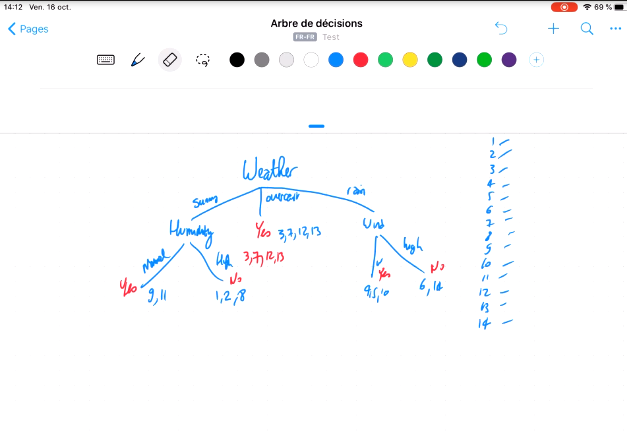

### Question 2:
 L'entropie caractérise le désordre d'une collection
d'instances. Soit $S$ un ensemble d'instances dont la classification
est binaire (les instances sont classées comme positives ou négatives). Une interprétation de la théorie de l'information est que l'entropie indique le nombre de bits nécessaires pour encoder la classification d'un membre arbitraire de $S$.  L'entropie de $S$ pour cette classification booléenne est définie par:

$$\mbox{entropie}(S) = -p_\oplus log_2(p_\oplus) - p_\ominus log_2(p_\ominus)$$
où

* $p_\oplus$ est la proportion d'exemples positifs dans $S$
* $p_\ominus$ est la proportion d'exemples négatifs dans $S$

Pour obtenir un abre de décision compacte et manière
gloutonne, on va faire en sorte que l'attribut suivant dans l'abre de
décision soit celui qui nous donne le maximum d'information. Une autre
façon d'exprimer cet objectif est de choisir l'attribut qui réduit le
plus l'entropie.

 On veut donc calculer le gain en information qui est la réduction
 d'entropie espérée en partitionnant les instances suivant la valeur
 d'un attribut. Pour un ensemble d'instances $S$ et un attribut $A$,
 le gain d'information est défini par:

$$\mbox{gain}(S,A) = \mbox{entropie}(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \mbox{entropie}(S_v)$$

où $S_v$ est l'ensemble des instances dont l'attribut $A$ a pour
valeur $v$. 

Appliquez la formule du gain pour les attributs Wind et Temperature.



In [ ]:
#calculer l'entropie


import numpy as np
p_plus= 5/14
p_moins=9/14
entropie_S= -p_plus*np.log2(p_plus) - p_moins*np.log2(p_moins)
print('Entropie(S)=', entropie_S) #0.94

wind= ['Weak', 'Strong']
entropie_weak=-(6/8)*np.log2(6/8)- (2/8)*np.log2(2/8)
print('Entropie(wind=weak)=', entropie_weak) #0.81
entropie_strong=-(3/6)*np.log2(3/6)- (3/6)*np.log2(3/6)
print('Entropie(wind=strong)=', entropie_strong) #1.0

#gain de wild
gain_wind= entropie_S - (8/14)*entropie_weak - (6/14)*entropie_strong
print('Gain(S,wind) = ', gain_wind) #0.048

#"on va calculer les gains"
print("\n Correction des gains: \n")
gain_weak=1-(2/8)**2-(6/8)**2
print('G(wind=weak)=', gain_weak)# 3/8= 0.375
gain_strong=1-(3/6)**2-(3/6)**2
print('G(wind=strong)=', gain_strong) #0.5

gain_wind1= (8/14)*gain_weak + (6/14)*gain_strong
print('Gain(S,wind) = ', gain_wind1) #0.4285


Entropie(S)= 0.9402859586706309
Entropie(wind=weak)= 0.8112781244591328
Entropie(wind=strong)= 1.0
Gain(S,wind) =  0.04812703040826932

 Correction des gains: 

G(wind=weak)= 0.375
G(wind=strong)= 0.5
Gain(S,wind) =  0.42857142857142855


### Question 3:
 L'application numérique donne le tableau
suivant:

| Weather | Humidity | Wind | Temperature |
|  :---:  |   :---:  | :---:|    :---:    |
| **Gain**    | 0.246    | 0.151 | 0.048 | 0.029 |




* Vérifiez que votre expression est correcte
* Traitez maintenant le cas où le temps est ensoleillé: donnez l'expression du gain. Sans faire les calculs, pouvez vous avoir une bonne idée sur le résultat?
* Pouvez vous deviner l'attribut pour le cas où il pleut?
* Faites de même pour le cas où le temps est nuageux.
* Dessinez l'arbre de décision produit par l'algorithme.

cas ensoleillé : humidity 

cas pluie : wind

cas nuageux : overcast

résultat = même arbre que question 1 => c'est le meilleur arbre

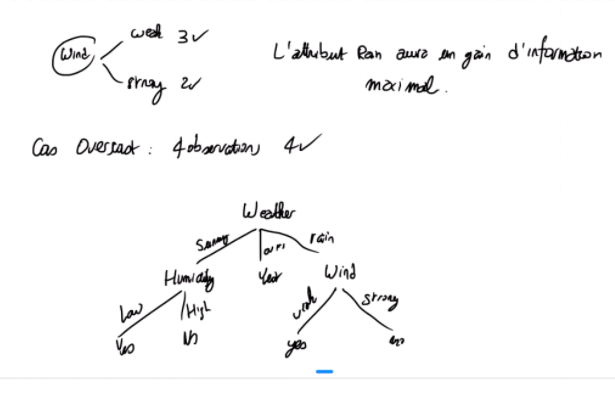

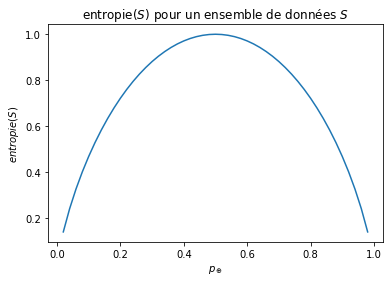

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1,endpoint=False)
x = x[1:] # on enleve le 0 pour éviter log(0)
plt.plot(x,-x*np.log(x) / np.log(2) - (1-x)*np.log(1-x)/np.log(2))
plt.ylabel('$entropie(S)$')
plt.xlabel('$p_\oplus$')
plt.title('entropie($S$) pour un ensemble de données $S$ ')
plt.show()



### Question 4
On va maintenant utiliser l'indice de Gini pour le choix de l'attribut au lieu du gain d'information

On rappelle ci-dessous les formules, mais tout d'abortd les notations.

* on considère un problème de classification où on a $k$ classes. (dans notre expemple, on a deux classes: soit on joue, soit on ne joue pas, donc ici, $k=2$)
* pour un attribut $A$ qui possède $n$ valeurs $a_1, \dots, a_n$
   * on note $p(a_i)$ la proportion d'exemples de valeurs $a_i$ dans les données
   * on note $p_j(a_i)$ la proportion des exemples dont la valeur de $A$ est $a_i$ qui sont de la classe $j$
   
On peut décomposer le calcul de l'indice de Gini de la façon suivante:

1 - On calcule l'indice pour chaque valeur $a_i$
     $$G(a_i) = 1- \sum_{j=1}^k p_j(a_i)^2$$
2 - On calcule la somme pondérée pour l'attribut $A$
     $$G(A) = \sum_{i=1}p(i) G(a_i) $$
    
Appliquez la formule de l'indice de Gini pour les attributs Wind et Temperature.

## Exercice 2 - scikit-learn

On va maintenant utiliser les outils de scikit-learn pour générer les arbres de décisions et pour les visualiser.

Pour la partie apprentissage, le fonctionnement est très similaire à ce qu'on a vu pour les $k$-plus proches voisins.

Le code ci-dessous génère l'arbre de décision avec les mêmes données que pour le TD précédent.

Le graphique des frontières de décisions est-il différent de celui des $k$-plus proches voisins. Qu'a-t-il de particulier? En comparant avec le graphe obtenu avec $k$-plus proches voisins, quelles régions sont classées différemment? Avez-vous une préférence?

Nom des classes:  [0 1 2]
Nombre d'observations dans chacune des classes: [50 50 50]
Il y a  600  observations avec  4  attributs


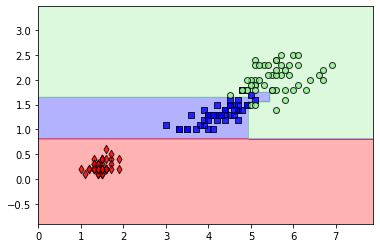

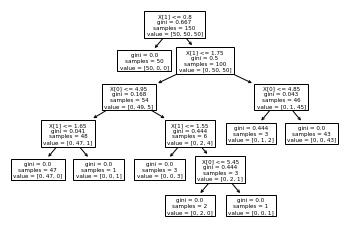

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier(criterion="gini")

from sklearn.datasets import load_iris
Xcomplet, y = load_iris(return_X_y=True) 
print("Nom des classes: ", np.unique(y))
print("Nombre d'observations dans chacune des classes:", np.bincount(y))
print("Il y a ", Xcomplet.size, " observations avec ", Xcomplet[0].size, " attributs")
X=Xcomplet[:,[2,3]]
# on travaille ici avec les colonnes 2 et 3, on pourra changer cela.

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('d', 's', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl, 
                    edgecolor='black')

dtree.fit(X, y)
plot_decision_regions(X, y, dtree)
plt.show()
tree.plot_tree(dtree)
plt.show()

La visualisation de l'arbre de décision n'est pas si lisible. Utilisez le code ci-dessous pour générer un fichier image png qui lui sera plus lisible. Il sera stocké dans vos fichiers sur le google drive (dans la colonne complètement à gauche de la fenêtre, il y a une icône fichier, vous pourrez voir le fichier en cliquant dessus).

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dd = export_graphviz(dtree, filled=True, rounded=True, class_names=['setosa', 'versicolor', 'virginia'], feature_names=['length', 'width'], out_file= None)
graph = graph_from_dot_data(dd)
graph.write_png("dtree-gini.png")

True

Générez un nouvel arbre avec le gain d'entropie. Les deux arbres sont-ils les mêmes?

Remarquez que nous n'avons pas utilisé beaucoup d'options lors de la création de l'objet DecisionTreeClassifier. Testez l'option où vous pouvez choisir la profondeur maximale de l'arbre, par exemple avec 3. Est-ce que cet arbre vous semble correct. Discutez par rapport aux abres générés précedemment.


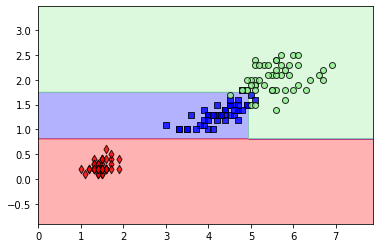

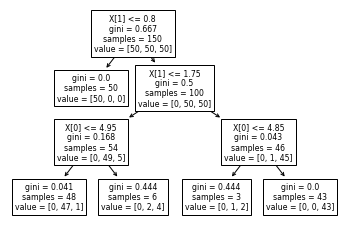


*******************************	creation d'un arbre de decision avec l'entropie	************ 



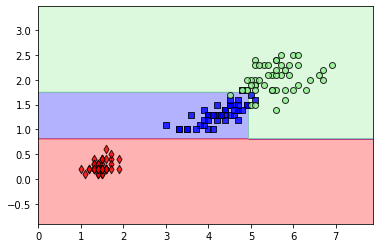

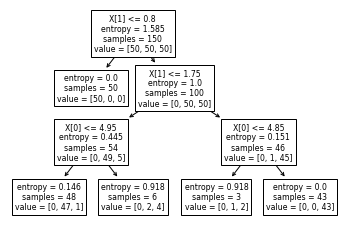

In [ ]:
#on va generer un nouvel arbre de decision en utilisant la formule de gini 
dtree2 = DecisionTreeClassifier(criterion="gini", max_depth=3)

#Build a decision tree classifier from the training set (X, y).
dtree2.fit(X, y)
plot_decision_regions(X, y, dtree2)
plt.show()
tree.plot_tree(dtree2)
plt.show()

dd2 = export_graphviz(dtree2, filled=True, rounded=True, class_names=['setosa', 'versicolor', 'virginia'], feature_names=['length', 'width'], out_file= None)
graph2 = graph_from_dot_data(dd2)
graph2.write_png("dtree-gini_depth3.png")

print("\n*******************************\tcreation d'un arbre de decision avec l'entropie\t************ \n")
dtree3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree3.fit(X, y)
plot_decision_regions(X, y, dtree3)
plt.show()
tree.plot_tree(dtree3)
plt.show()
dd3 = export_graphviz(dtree3, filled=True, rounded=True, class_names=['setosa', 'versicolor', 'virginia'], feature_names=['length', 'width'], out_file= None)
graph3 = graph_from_dot_data(dd3)
graph3.write_png("dtree-entropi.png")
print("\n\n")